In [1]:
from truthnet.util import validate
import pandas as pd
import seaborn as sns

In [2]:
from truthnet import load_veritas_model
from truthnet.util import drop_empty_string_keys
import numpy as np
M=load_veritas_model('../../veritas_models/veritas_006_SUD.pkl.gz')
df=pd.read_csv('../../data/SUD.csv',index_col=0,
            keep_default_na=False,dtype=str)
featurenames=M['model'].feature_names
training_index=M['model'].training_index
test_index=np.array([x for x in df.index.values if x not in training_index])
df_test=df.loc[test_index,:][featurenames]
D=df_test.T.to_dict()
D1={k:drop_empty_string_keys(v) for k,v in D.items()}
D=[{'SUB'+str(k):v} for k,v in D1.items()]

from truthnet.truthfinder import reveal
Rsud=reveal(D,M,perturb=0,model_path=False,score=False)
resf=pd.DataFrame({x['subject_id']:[x['lower_threshold'],x['lower_prob'],x['veritas'],x['veritas_prob']] for x in  Rsud[0]}).T
resf.columns=['lower_threshold','lower_p','veritas','veritas_p']
resf=resf.assign(score=resf.lower_threshold)

ckeck passed


In [3]:
df_train=df.loc[training_index,:][featurenames]
Dt=df_train.T.to_dict()
Dt1={k:drop_empty_string_keys(v) for k,v in Dt.items()}
Dt=[{'SUB'+str(k):v} for k,v in Dt1.items()]


Rsudt=reveal(Dt,M,perturb=0,model_path=False,score=False)
resft=pd.DataFrame({x['subject_id']:[x['lower_threshold'],x['lower_prob'],x['veritas'],x['veritas_prob']] for x in  Rsudt[0]}).T
resft.columns=['lower_threshold','lower_p','veritas','veritas_p']
resft=resft.assign(score=resft.lower_threshold)

ckeck passed


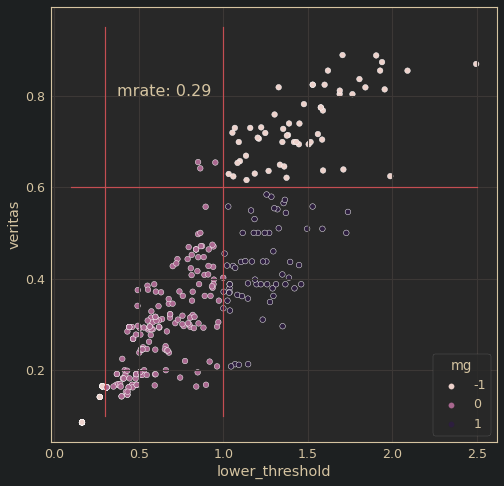

In [45]:
from jupyterthemes import jtplot
jtplot.style()
rft=validate(resft,C0=.3,C1=0.6,C2=1,DX=False,score=False,plots=True,
         outfile='/home/ishanu/ZED/Research/truthnet/truthnet/examples/sudvalidt.png',
         validation_type='noscore')
import pylab as plt
plt.savefig('tt.png',dpi=600,bbox_inches='tight')

In [41]:
! pwd

/home/ishanu/ZED/Research/truthnet/truthnet/examples


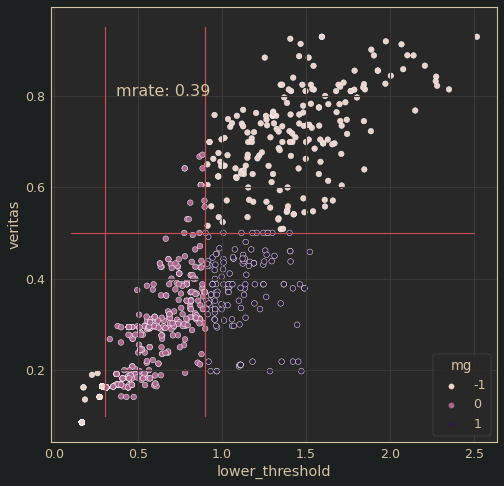

In [69]:
rf=validate(resf,C0=.3,C1=0.5,C2=.9,DX=False,score=False,
         outfile='sudvalid.png',
         validation_type='noscore')
plt.savefig('ttx.png',dpi=600,bbox_inches='tight')

<AxesSubplot:xlabel='veritas', ylabel='Density'>

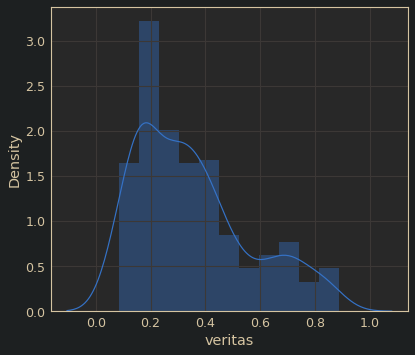

In [34]:
sns.distplot(rft[1].veritas)

<AxesSubplot:xlabel='veritas', ylabel='lower_threshold'>

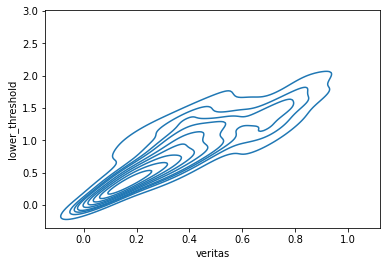

In [8]:
sns.kdeplot(data=rft[1],x='veritas',y='lower_threshold')

In [9]:
M

{'version': '0.0.1',
 'model': qnet.Qnet,
 'problem': '',
 'calibration_lower': array([0.47872451, 0.47872451, 0.47872451, ..., 0.43673732, 0.53668621,
        0.48710581]),
 'calibration_veritas': array([0.29534552, 0.29534552, 0.29534552, ..., 0.23566049, 0.25      ,
        0.19982456]),
 'dist_lower': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7ff2e3586710>,
 'LOWER_THRESHOLD': 0.41010900984469,
 'dist_veritas': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7ff2e3587070>,
 'VERITAS_THRESHOLD': 0.46638887956123853}

<AxesSubplot:ylabel='Density'>

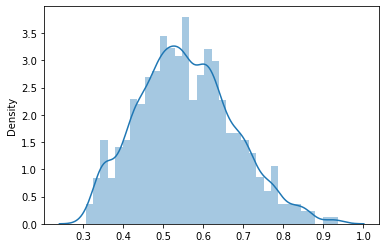

In [12]:
sns.distplot(M['calibration_lower'])

<AxesSubplot:ylabel='Density'>

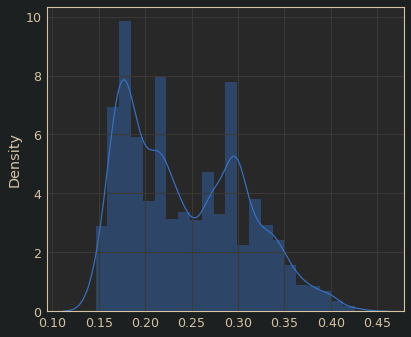

In [32]:
sns.distplot(M['calibration_veritas'])

In [70]:
a1=rf[1][rf[1].mg==1].index.size
a0=rf[1][rf[1].mg==0].index.size
a1/875,a0/875,a1/875+a0/875

(0.15314285714285714, 0.4582857142857143, 0.6114285714285714)

In [71]:
(1-a0/875)

0.5417142857142857